# Indian Premier League Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [3]:
import os
os.chdir('D:/Datasets/IPL')
os.listdir()

['deliveries.csv',
 'matches.csv',
 'most_runs_average_strikerate.csv',
 'Players.xlsx',
 'teams.csv',
 'teamwise_home_and_away.csv']

In [4]:
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')
teams = pd.read_csv('teams.csv')

## Cleaning and Preprocessing

### Add Boundries

In [5]:
deliveries['fours'] = np.where(deliveries.batsman_runs == 4, 1, 0)
deliveries['sixes'] = np.where(deliveries.batsman_runs == 6, 1, 0)

### Dismissal

In [6]:
deliveries.dismissal_kind = deliveries.dismissal_kind.replace(np.nan, 'No')
enc = LabelEncoder().fit(deliveries.dismissal_kind)
lbl = enc.transform(deliveries.dismissal_kind)
one = OneHotEncoder().fit_transform(lbl.reshape((-1, 1)))
deliveries[enc.classes_] = one.toarray().astype(np.int)

In [7]:
matches.Season = matches.Season.map(lambda x: x[4:])
matches.date = pd.to_datetime(matches.date)

## Team wise Runs and Boundries Till 2019

In [8]:
team = deliveries.pivot_table(index=['batting_team'], values=['total_runs', 'fours', 'sixes'], aggfunc='sum').sort_values(by=['total_runs'], ascending=False).reset_index()
team

,batting_team,fours,sixes,total_runs
0,Mumbai Indians,2588,1096,29809
1,Royal Challengers Bangalore,2360,1132,28126
2,Kings XI Punjab,2458,976,27893
3,Kolkata Knight Riders,2434,930,27419
4,Chennai Super Kings,2193,973,26418
5,Delhi Daredevils,2158,801,24388
6,Rajasthan Royals,2035,681,22431
7,Sunrisers Hyderabad,1444,533,17059
8,Deccan Chargers,957,400,11463
9,Pune Warriors,525,196,6358


<AxesSubplot:title={'center':'Boundries'}, xlabel='batting_team'>

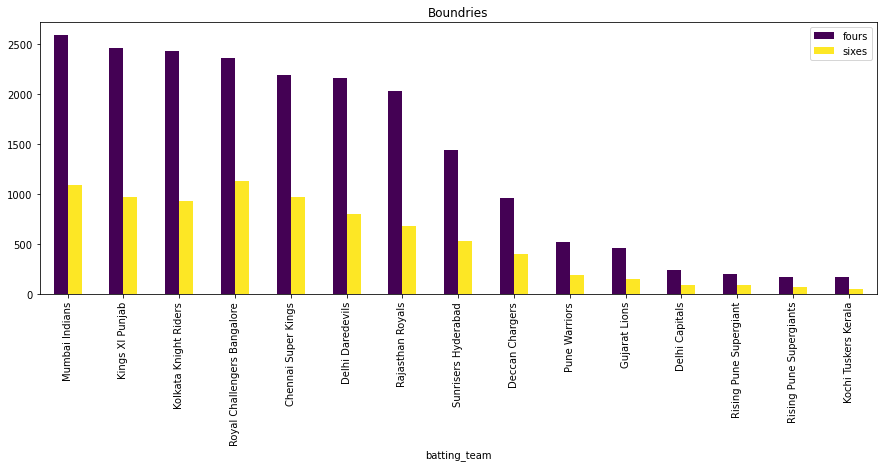

In [9]:
team.sort_values(by=['fours'],  ascending=False).plot(kind='bar', 
          x='batting_team',
          y=['fours', 'sixes'],
          colormap='viridis', 
          figsize=(15, 5), 
          title='Boundries')

<AxesSubplot:>

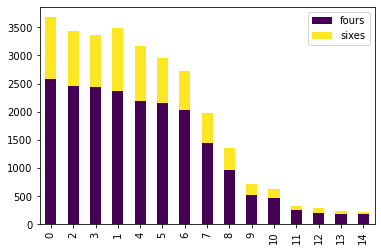

In [47]:
dt[['fours', 'sixes']].plot(kind='bar', stacked=True, cmap='viridis', )

Int64Index([0, 2, 3, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

## Player Wise Runs and Boundries Till 2019

In [10]:
batsman = deliveries.pivot_table(index=['batsman'], values=['total_runs', 'fours', 'sixes', 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'], aggfunc='sum').sort_values(by=['total_runs'], ascending=False).reset_index()
batsman.head()

,batsman,bowled,caught,caught and bowled,fours,hit wicket,lbw,obstructing the field,retired hurt,run out,sixes,stumped,total_runs
0,SK Raina,16,112,7,495,0,6,0,0,12,195,8,5651
1,V Kohli,30,95,2,482,0,7,0,0,15,191,3,5616
2,RG Sharma,22,103,6,431,0,11,0,0,17,194,3,5057
3,DA Warner,23,69,2,459,1,4,0,0,10,181,5,4975
4,S Dhawan,28,79,2,526,0,8,0,1,14,96,5,4876


In [11]:
batsman.sort_values(by='stumped', ascending=False).head()

,batsman,bowled,caught,caught and bowled,fours,hit wicket,lbw,obstructing the field,retired hurt,run out,sixes,stumped,total_runs
0,SK Raina,16,112,7,495,0,6,0,0,12,195,8,5651
6,RV Uthappa,14,108,3,436,0,13,0,0,12,156,7,4703
13,AT Rayudu,19,67,5,278,0,4,0,0,12,120,7,3454
35,F du Plessis,12,31,2,164,0,0,0,0,5,59,6,1943
8,AB de Villiers,20,67,1,357,0,6,0,0,4,214,6,4583


<AxesSubplot:title={'center':'run outs'}, xlabel='batsman'>

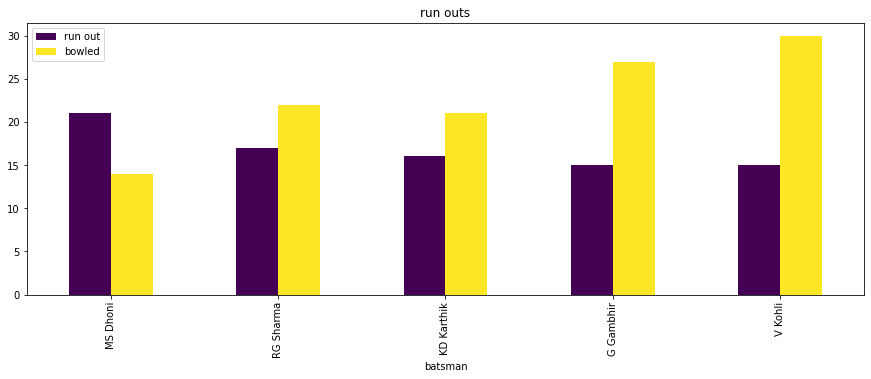

In [12]:
batsman.sort_values(by='run out', ascending=False).head(5).plot(kind='bar', x='batsman', y=['run out', 'bowled'], colormap='viridis', 
          figsize=(15, 5), 
          title='run outs')

In [ ]:
 deliveries.pivot_table(index=['batsman'], values=['total_runs', 'fours', 'sixes', 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'], aggfunc='sum').sort_values(by=['total_runs'], ascending=False).reset_index()

In [16]:
deliveries.fielder.value_counts().head(20)

MS Dhoni          159
KD Karthik        152
RV Uthappa        125
SK Raina          115
AB de Villiers    114
PA Patel           97
RG Sharma          92
V Kohli            90
KA Pollard         85
NV Ojha            82
WP Saha            82
RA Jadeja          80
DJ Bravo           78
MK Pandey          77
AC Gilchrist       75
S Dhawan           73
AT Rayudu          65
DA Warner          62
AM Rahane          62
KC Sangakkara      58
Name: fielder, dtype: int64

## Bowling

In [25]:
bowlers = deliveries.pivot_table(index=['bowler'], values=['bowled', 'caught', 'caught and bowled', 'stumped' ,'hit wicket' ,'fours', 'sixes', 'total_runs'], aggfunc='sum').sort_values(by=['total_runs'], ascending=False).reset_index()
bowlers['total_wickets'] = bowlers[['bowled', 'caught', 'caught and bowled', 'stumped' ,'hit wicket']].T.agg(func=np.sum)

In [27]:
bowlers.sort_values(by=['total_wickets'], ascending=False)

,bowler,bowled,caught,caught and bowled,fours,hit wicket,sixes,stumped,total_runs,total_wickets
5,SL Malinga,63,91,5,316,0,86,0,3511,159
2,A Mishra,25,89,3,218,0,170,26,3850,143
1,Harbhajan Singh,29,84,10,289,1,142,18,4050,142
3,DJ Bravo,20,113,8,291,0,134,0,3733,141
0,PP Chawla,43,72,4,305,0,171,14,4153,133
...,...,...,...,...,...,...,...,...,...,...
371,DJ Harris,0,0,0,2,0,1,0,26,0
372,RR Bose,0,0,0,5,0,0,0,24,0
373,LRPL Taylor,0,0,0,0,0,2,0,24,0
374,I Malhotra,0,0,0,2,0,2,0,23,0


In [28]:
deliveries.dismissal_kind.unique()

array(['No', 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [309]:
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,No,bowled,caught,caught and bowled,hit wicket,lbw,obstructing the field,retired hurt,run out,stumped
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,1,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,1,0,0,0,0,0,0,0,0,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,1,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,1,0,0,0,0,0,0,0,0,0
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,1,0,0,0,0,0,0,0,0,0
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,0,1,0
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,1,0,0,0,0,0,0,0,0,0


In [50]:
temp = deliveries.pivot_table(index=['match_id', 'batsman'], values=['fours', 'sixes'], aggfunc=sum).reset_index()
temp = temp.merge(matches[['id', 'Season']], left_on='match_id', right_on='id').drop(['id'], axis=1)

In [51]:
temp

,match_id,batsman,fours,sixes,Season
0,1,A Choudhary,0,1,2017
1,1,BCJ Cutting,0,2,2017
2,1,CH Gayle,2,3,2017
3,1,DA Warner,2,1,2017
4,1,DJ Hooda,0,1,2017
...,...,...,...,...,...
11289,11415,RD Chahar,0,0,2019
11290,11415,RG Sharma,1,1,2019
11291,11415,SK Raina,0,0,2019
11292,11415,SN Thakur,0,0,2019


In [54]:
player = 'V Kohli'
dat = temp[temp.batsman == player]
dat.groupby('Season').sum()

,match_id,fours,sixes
Season,,,
2008,1010,18,4
2009,1872,22,8
2010,2666,26,12
2011,4418,55,16
2012,5162,33,10
2013,6681,65,22
2014,6793,23,16
2015,8825,35,23
2016,9767,84,38


In [46]:
temp[temp.batsman == 'V Kohli']

,match_id,batsman,fours,sixes,id,Season
170,12,V Kohli,5,2,12,2017
250,17,V Kohli,3,1,17,2017
300,20,V Kohli,7,1,20,2017
404,27,V Kohli,0,0,27,2017
447,30,V Kohli,0,1,30,2017
...,...,...,...,...,...,...
10988,11330,V Kohli,2,0,11330,2019
11025,11333,V Kohli,2,0,11333,2019
11086,11337,V Kohli,2,1,11337,2019
11128,11340,V Kohli,1,3,11340,2019


In [35]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'fours', 'sixes', 'No', 'bowled', 'caught',
       'caught and bowled', 'hit wicket', 'lbw', 'obstructing the field',
       'retired hurt', 'run out', 'stumped'],
      dtype='object')

In [40]:
matches[['id', 'Season']]

,id,Season
0,1,2017
1,2,2017
2,3,2017
3,4,2017
4,5,2017
...,...,...
751,11347,2019
752,11412,2019
753,11413,2019
754,11414,2019


In [10]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-06-04,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-07-04,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-08-04,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-08-04,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [11]:
matches['bat_first'] = np.where(matches.toss_decision=='bat', 1, 0)
matches['field_first'] = np.where(matches.toss_decision=='field', 1, 0)
matches['toss_win_match_win'] = np.where(matches.toss_winner==matches.winner, 1, 0)
matches['toss_win_match_loss'] = np.where(matches.toss_winner!=matches.winner, 1, 0)

In [12]:
print(matches.columns)
matches.head()

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'bat_first', 'field_first', 'toss_win_match_win',
       'toss_win_match_loss'],
      dtype='object')


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,bat_first,field_first,toss_win_match_win,toss_win_match_loss
0,1,2017,Hyderabad,2017-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,0,1,0,1
1,2,2017,Pune,2017-06-04,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,...,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,0,1,1,0
2,3,2017,Rajkot,2017-07-04,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,...,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,0,1,1,0
3,4,2017,Indore,2017-08-04,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,...,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,0,1,1,0
4,5,2017,Bangalore,2017-08-04,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,...,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,1,0,1,0


In [13]:
%matplotlib inline
import time

In [14]:
colormaps = ('Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r')

In [15]:
len(colormaps)
nipy_spectral
jet_r
icefire
Set3
Set2
PuBu
Pastel2
Dark2
Accent

174

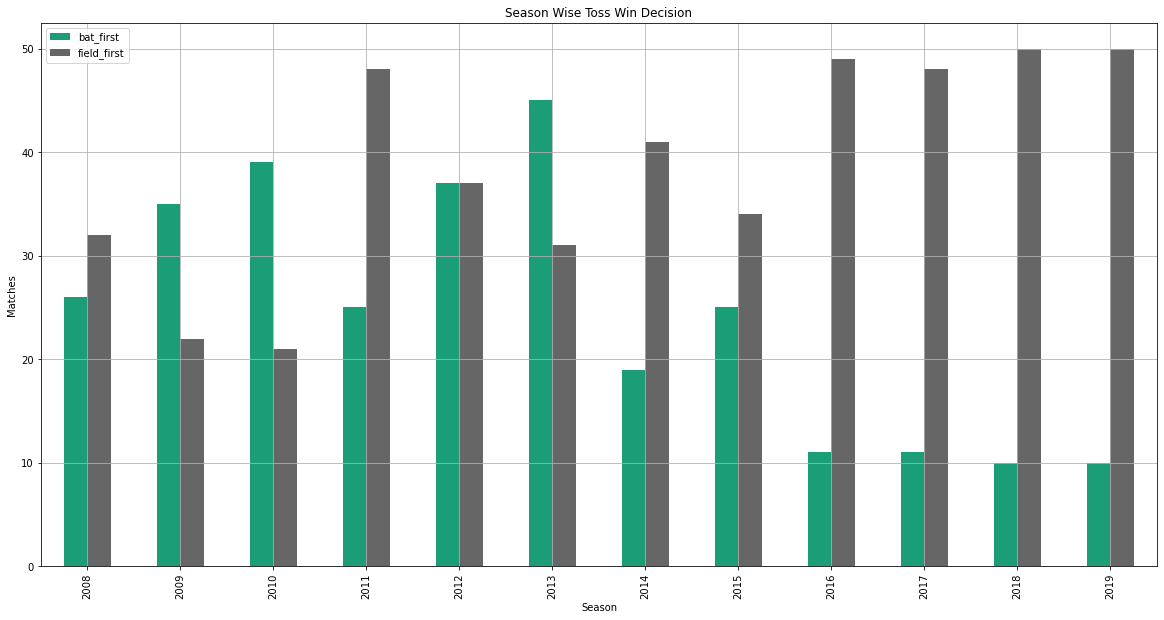

In [20]:
matches.groupby(by='Season').sum()[['bat_first', 'field_first']].plot(kind='bar', figsize=(20, 10), colormap='Dark2')
plt.grid()
plt.title('Season Wise Toss Win Decision')
plt.xlabel('Season')
plt.ylabel('Matches')
plt.show()

In [31]:
plt.style.use('seaborn')

Text(0, 0.5, 'Matches')

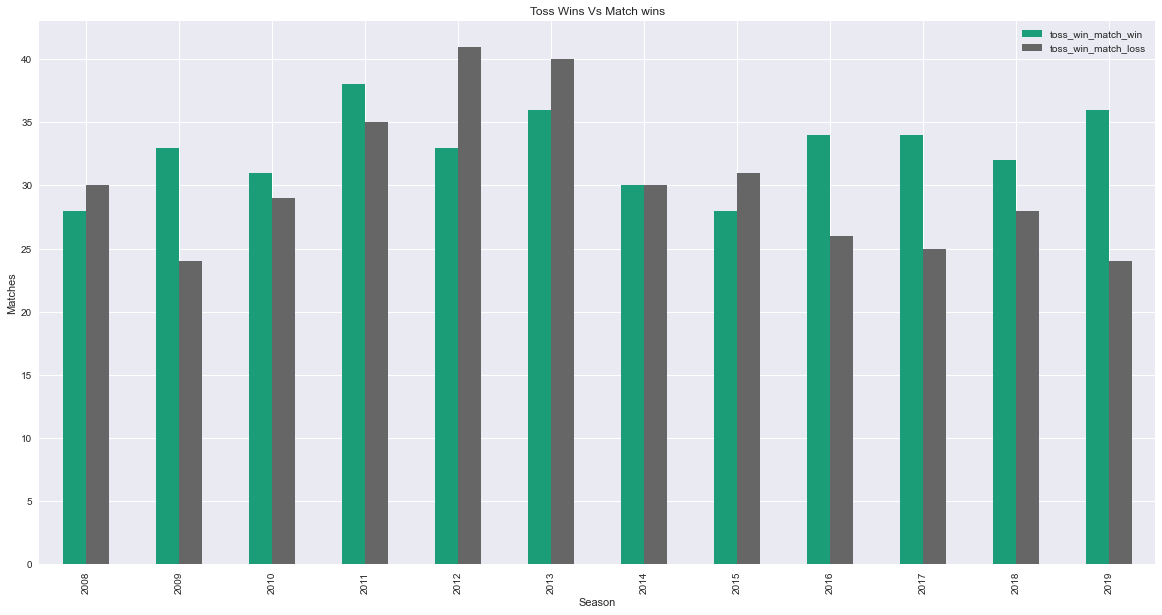

In [32]:
matches.groupby(by='Season').sum()[['toss_win_match_win', 'toss_win_match_loss']].plot(kind='bar', figsize=(20, 10), cmap='Dark2')
plt.title('Toss Wins Vs Match wins')
plt.xlabel('Season')
plt.ylabel('Matches')

In [ ]:
matches.groupby(by='Season').sum()[['bat_first', 'field_first']].plot(kind='bar', figsize=(20, 10), stacked=True, colormap='viridis_r')
plt.xlabel('Season')
plt.ylabel('Matches')

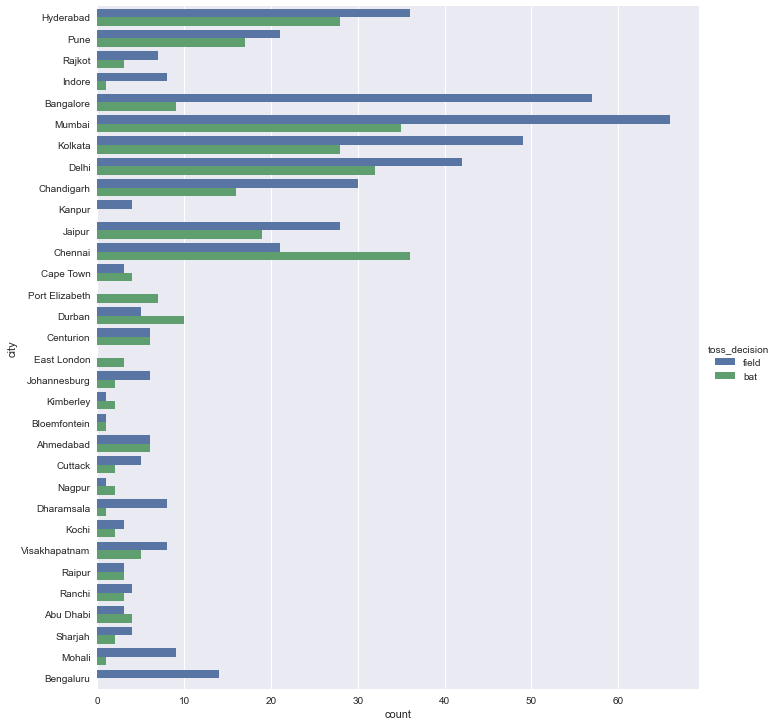

In [38]:
sns.catplot(y='city', data=matches, kind='count', hue='toss_decision', height=10)

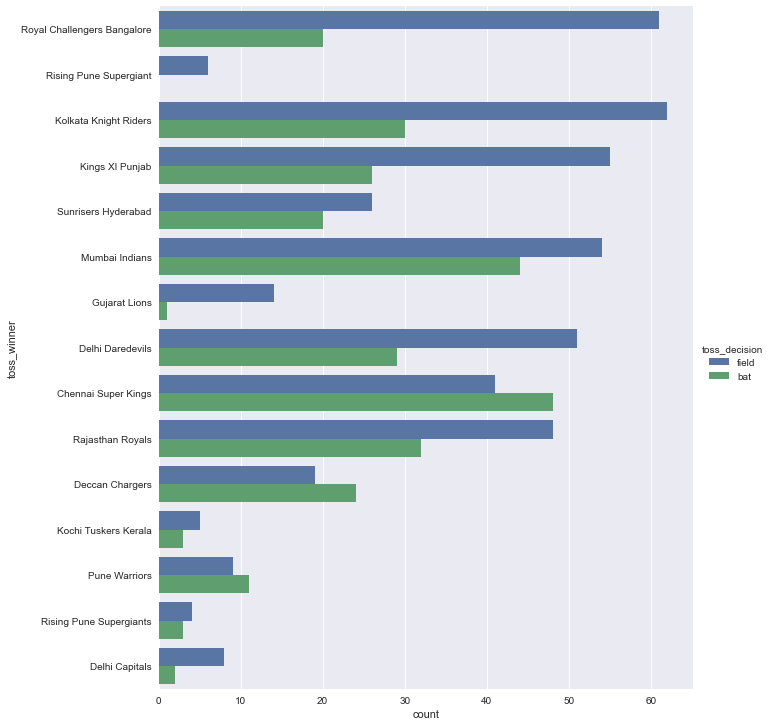

In [39]:
sns.catplot(y='toss_winner', data=matches, kind='count', hue='toss_decision', height=10)

In [ ]:
%matplotlib inline

In [ ]:
matches.pivot_table(index='city', values=['bat_first', 'field_first'], aggfunc='sum').style.background_gradient('summer_r')

In [ ]:
matches.pivot_table(index='city', values=['bat_first', 'field_first'], aggfunc='sum').plot(
    kind='barh', 
    stacked=True, 
    colormap='viridis_r', 
    figsize=(10, 15), 

)

In [ ]:
help(matches.plot)

In [ ]:
data.pivot_table(values=['total_runs', 'wide_runs', 'penalty_runs'], index=['match_id', 'inning'], aggfunc='sum')

In [ ]:
data[(data['bowling_team'] == 'Royal Challengers Bangalore')].pivot_table(index=['match_id', 'inning'], values=['total_runs'], aggfunc='sum')

In [ ]:
filtered = data.pivot_table(index=['match_id', 'bowling_team','batting_team', 'inning'], aggfunc='sum')

In [ ]:
filtered=filtered.reset_index().set_index('match_id')

In [ ]:
filtered

In [ ]:
d2 = filtered[filtered['bowling_team']=='Royal Challengers Bangalore']

In [ ]:
plt.bar(data=d2.groupby('inning').mean().reset_index(), x='inning', height='total_runs')
plt.xticks([1, 2, 3, 4])

In [ ]:
d2[d2['inning']==1].mean()

In [ ]:
d2

In [ ]:
filtered_data = data.pivot_table(index=['match_id', 'inning', 'batting_team', 'bowling_team'], aggfunc='sum')
filtered_data

In [ ]:
filtered_data = filtered_data.reset_index()

In [ ]:
filter(lambda x filtered.batting_team.unique()

In [ ]:
filtered_data

In [ ]:
#filtered_data = filtered_data.groupby(['batting_team', 'inning']).sum().reset_index()

In [ ]:
#team = 'Royal Challengers Bangalore'
#inning = 1

In [ ]:
fltr = lambda name: ''.join([i for i in name if i.isupper()])

In [ ]:
filtered_data = filtered_data[filtered_data.inning<=2]

In [ ]:
filtered_data.batting_team = filtered_data.batting_team.map(fltr)
filtered_data.bowling_team = filtered_data.bowling_team.map(fltr)

In [ ]:
%matplotlib nbagg

In [31]:
g = sns.catplot(
    data=filtered_data, 
    x='bowling_team', 
    y='total_runs', 
    kind='bar', 
    hue='inning',  
    ci="sd", 
    palette="dark", 
    #alpha=.6, 
    height=6
)
g.despine(left=True)

ValueError: Could not interpret input 'bowling_team'

In [ ]:
def fun(kind, type_='total_runs'):
    """
    Parameter
    kind : batting_team / bowling_team
    type_ : 'total_runs / extra_runs/ wide_runs/ noball_runs'
    """
    g = sns.catplot(
        data=filtered_data, 
        x=kind, 
        y=type_, 
        kind='bar', 
        hue='inning',  
        ci="sd", 
        palette="dark", 
        #alpha=.6, 
        height=6
        )
    g.despine(left=True)

In [ ]:
fun(kind='batting_team', type_='noball_runs')